<a href="https://colab.research.google.com/github/anthopper/meteorology/blob/main/RSR_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this block before anything else

%env PYTHONPATH=
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
!rm ./Miniconda3-4.5.4-Linux-x86_64.sh
!conda install -q -y --prefix /usr/local python=3.7 cartopy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
%matplotlib inline

import scipy.io.netcdf as sp
import matplotlib.pyplot as plt
import numpy as np

!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.util import add_cyclic_point



env: PYTHONPATH=
--2022-03-02 18:42:22--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   249MB/s    in 0.2s    

2022-03-02 18:42:23 (249 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
i

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Open the dataset file
fileObj = sp.NetCDFFile('/content/drive/My Drive/Meteorology/CERES_EBAF-TOA_Ed4.1_Subset_200003-202111.nc', 'r')
print('here 2')

here 2


In [3]:
# Make variables to store all the RSR, latitude, and longitude values
RSR = fileObj.variables['toa_sw_all_mon'][:]
lat = fileObj.variables['lat'][:]
lon = fileObj.variables['lon'][:]
print('here 3')

here 3


In [4]:
numYears = RSR.shape[0] // 12
print('here 4')

here 4


In [5]:
# Take a subset of the data in which the extra months at the end that are not part of a full year are excluded
fullYearRSR = RSR[0:numYears * 12, :, :]
print('here 5')

here 5


In [6]:
# Average the data at each location across all months
means = fullYearRSR.mean(axis=0)
print('here 6')

here 6


In [7]:
# Fix problem with 0 longitude missing data
means, lon = add_cyclic_point(means, coord=lon)
print('here 7')

here 7


here 8


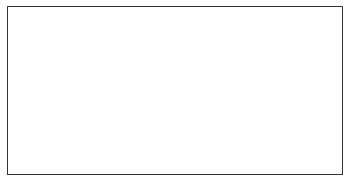

In [10]:
# Set up a global map using the Plate Carree projection and add coastlines
axes = plt.axes(projection=ccrs.PlateCarree())

print('here 8')

In [9]:
axes.add_feature(cf.COASTLINE, linewidth=0.5)

here 9
here 10


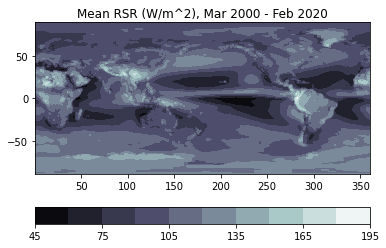

In [11]:
# Overlay the contours onto the map based on the mean RSR values at each location. Include a color bar and add a title
plt.contourf(lon[:], lat[:], means[:,:], levels=12, cmap='bone')
plt.colorbar(orientation='horizontal')
plt.title('Mean RSR (W/m^2), Mar 2000 - Feb 2020')
print('here 9')

# Save a PNG image of the map
plt.savefig('/content/drive/My Drive/Meteorology/RSR_Map.png', bbox_inches='tight', dpi=200)
print('here 10')

# projection options: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
# cmap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html